In [1]:
# Import necessary packages
from gerrychain import (GeographicPartition, Partition, Graph, MarkovChain,
                        proposals, updaters, constraints, accept, Election, grid)
from gerrychain.metrics import mean_median, partisan_bias, polsby_popper, efficiency_gap
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import inspect
import pickle
import geopandas as gp

In [12]:
# Import tools file
from gerrymandering_tools import *

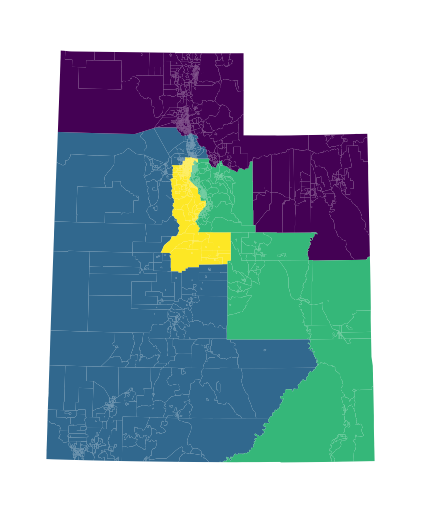

In [3]:
# Get the graph data from the file
utah = Graph.from_json("2012_with_buffer_graph-2020-02-18.json")

# Define our updaters    
my_updaters = {"population": updaters.Tally("POP100", alias="population"), 
               "d": updaters.Tally("DEM", alias="d"),
               "r": updaters.Tally("REP", alias="r"),
               "polsby_popper": polsby_popper,
              }
    
# Define our initial partition
initial_partition = GeographicPartition(utah, "US_Distric", my_updaters)

# Get the precincts
with open("2018_precincts_with_pop_and_prorated_votes.pkl",'rb') as f:
    precincts = pickle.load(f)
    
# Plot the current congressional district map
plot_district_map(initial_partition.assignment, precincts=precincts)

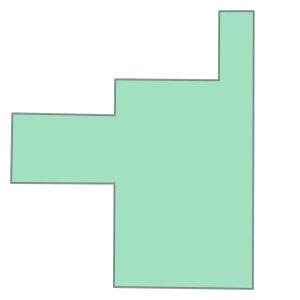

In [10]:
# Get the shapefile data
g = gp.read_file("2012_dists-Copy1.shp")

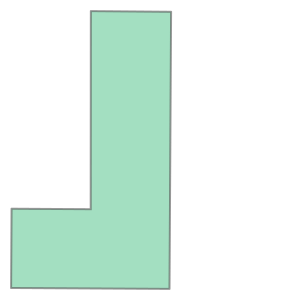

In [14]:
# Plot a precinct
g.iloc[35]["geometry"]

In [5]:
# Load the stored partisan environment data
partisan_environment = pickle.load(open("partisan_environments.pkl", 'rb'))


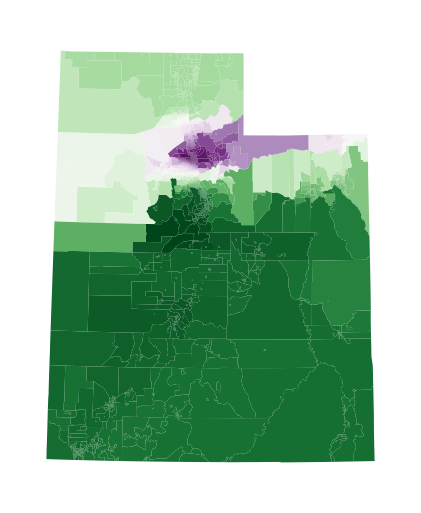

In [6]:
# Graph the partisan environments in Utah
size, dpi =(3,2), 300
g["partisan_environment"] = partisan_environment
fig, ax = plt.subplots(figsize=size, dpi=dpi)
g.plot(column='partisan_environment', ax=ax, cmap='PRGn')
plt.axis("off")
plt.savefig("partisan_environments1PRGn.png", dpi=dpi, bbox_inches="tight")

[0.68623522 0.5932369  0.70552519 0.59350691]


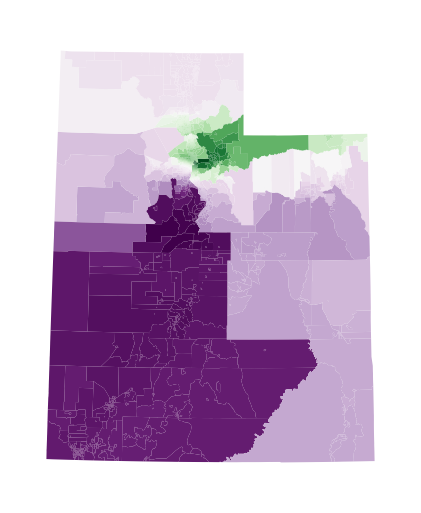

In [7]:
# Graph partisan dislocation
graph_partisan_dislocation(initial_partition.assignment, geodf=g, cmap='PRGn', save=False, savetitle="utah_partisan_dislocationPRGn")

In [8]:
initial_partition["r"]

{1: 93570.82872433287,
 2: 113448.80697030366,
 0: 94164.50758127809,
 3: 84593.85672408537}

In [9]:
# What is Utah's average absolute partisan dislocation score?
pd_score(initial_partition['r'], initial_partition['d'],  initial_partition.assignment)

NameError: name 'pd_score' is not defined

In [6]:
gdf = gp.read_file('UtahData/18_Precincts_combined_contiguous-Copy1.shp')

In [15]:
gdf['NEW_REP'] = 0.5*(gdf['SEN_REP']+gdf['G_REP'])

In [16]:
gdf['NEW_DEM'] = 0.5*(gdf['SEN_DEM']+gdf['G_DEM'])

In [17]:
gdf.columns

Index(['CountyID', 'VistaID', 'POP100', 'SEN_DEM', 'SEN_REP', 'G_DEM', 'G_REP',
       'US_Distric', 'UT_SEN', 'UT_HOUSE', 'geometry', 'NEW_REP', 'NEW_DEM'],
      dtype='object')

In [65]:
d = get_partisan_environments(gdf, dem_alias='NEW_DEM', rep_alias='NEW_REP')

In [31]:
# Add two new attributes to the graph
graph = Graph.from_json('UtahData/graph_zero_2018.json')

for n in graph.nodes:
    graph.nodes[n]['COMB_DEM'] = 0.5*(graph.nodes[n]['SEN_DEM'] + graph.nodes[n]['G_DEM'])
    graph.nodes[n]['COMB_REP'] = 0.5*(graph.nodes[n]['SEN_REP'] + graph.nodes[n]['G_REP'])

graph.to_json('UtahData/graph_combined_vs_2018.json')

In [32]:
d = pd.DataFrame(columns=['a', 'b', 'c', 'd'], index=np.arange(5))

In [66]:
pickle.dump(d, open('partisan_environments_combined.pkl', 'wb'))

In [67]:
type(d)

numpy.ndarray

In [37]:
d.loc[:, 'b':'d']

,b,c,d
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [38]:
labels = ["PP1", "PP2", "PP3", "PP4", "Cut Edges", "POP1", "POP2", "POP3", "POP4", "County Splits", "Mattingly Splits Score",
              'Avg Abs Partisan Dislocation - SEN', 'Avg Abs Partisan Dislocation - G', 'Avg Abs Partisan Dislocation - COMB',
              "Mean Median - SEN", "Mean Median - G", 'Mean Median - COMB',
              "Efficiency Gap - SEN", "Efficiency Gap - G", 'Efficiency Gap - COMB',
              "Partisan Bias - SEN", "Partisan Bias - G", 'Partisan Bias - COMB',
              "Partisan Gini - SEN", "Partisan Gini - G", 'Partisan Gini - COMB',
              "Seats Won - SEN", "Seats Won - G", 'Seats Won - COMB',
              "Sorted SenRep Vote Share 1", "Sorted SenRep Vote Share 2", "Sorted SenRep Vote Share 3", "Sorted SenRep Vote Share 4",
              "Sorted GRep Vote Share 1", "Sorted GRep Vote Share 2", "Sorted GRep Vote Share 3", "Sorted GRep Vote Share 4",
              "Sorted CombRep Vote Share 1", "Sorted CombRep Vote Share 2", "Sorted CombRep Vote Share 3", "Sorted CombRep Vote Share 4"]

In [56]:
labels[5:9]

['POP1', 'POP2', 'POP3', 'POP4']

In [41]:
labels[37:41]

['Sorted CombRep Vote Share 1',
 'Sorted CombRep Vote Share 2',
 'Sorted CombRep Vote Share 3',
 'Sorted CombRep Vote Share 4']

In [42]:
labels[33:37]

['Sorted GRep Vote Share 1',
 'Sorted GRep Vote Share 2',
 'Sorted GRep Vote Share 3',
 'Sorted GRep Vote Share 4']

In [43]:
labels[29:33]

['Sorted SenRep Vote Share 1',
 'Sorted SenRep Vote Share 2',
 'Sorted SenRep Vote Share 3',
 'Sorted SenRep Vote Share 4']

In [49]:
d

,a,b,c,d
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


In [54]:
d.min(axis=1)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [57]:
d.var(axis=1)

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

In [69]:
graph

<Graph [2640 nodes, 7294 edges]>

In [68]:
Election

gerrychain.updaters.election.Election

In [71]:
my_updaters = {"population": updaters.Tally('POP100', alias="population"),
                       "gd": updaters.Tally("G_DEM", alias="gd"),
                       "gr": updaters.Tally("G_REP", alias="gr"),
                       "sd": updaters.Tally("SEN_DEM", alias="sd"),
                       "sr": updaters.Tally("SEN_REP", alias="sr"),
                       "cd": updaters.Tally("COMB_DEM", alias='cd'),
                       "cr": updaters.Tally("COMB_REP", alias='cr'),
                       "polsby_popper": polsby_popper,
                       "split_counties": SplitCounties(),
                       'SEN10': Election('SEN10', {"Dem": "SEN_DEM", "Rep": "SEN_REP"}),
                       'G10': Election('G10', {"Dem": "G_DEM", "Rep": "G_REP"}),
                       'COMB10': Election('COMB10', {"Dem":"COMB_DEM", "Rep":"COMB_REP"}),
                       'assignment_array': AssignmentArray()
                      }

# Define our initial partition
initial_partition = GeographicPartition(graph, 'US_Distric', my_updaters)

In [141]:
len(initial_partition.assignment.parts)

4

In [80]:
print(inspect.getsource(updaters.election.ElectionResults))

class ElectionResults:
    """
    Represents the results of an election. Provides helpful methods to answer
    common questions you might have about an election (Who won? How many seats?, etc.).
    """

    def __init__(self, election, counts, races):
        self.election = election
        self.totals_for_party = counts
        self.races = races

        self.totals = {
            race: sum(counts[party][race] for party in self.election.parties)
            for race in self.races
        }

        self.percents_for_party = {
            party: get_percents(counts[party], self.totals)
            for party in election.parties
        }

    def __str__(self):
        results_by_part = "\n".join(
            format_part_results(self.percents_for_party, part) for part in self.totals
        )
        return "Election Results for {name}\n{results}".format(
            name=self.election.name, results=results_by_part
        )

    def seats(self, party):
        """
        Returns

In [78]:
updaters.election.ElectionResults

gerrychain.updaters.election.ElectionResults

In [81]:
print(inspect.getsource(efficiency_gap))

def efficiency_gap(results):
    """
    Computes the efficiency gap for the given ElectionResults.
    A positive value indicates an advantage for the first party listed
    in the Election's parties_to_columns dictionary.
    """
    party1, party2 = [results.counts(party) for party in results.election.parties]
    wasted_votes_by_part = map(wasted_votes, party1, party2)
    total_votes = results.total_votes()
    numerator = sum(waste2 - waste1 for waste1, waste2 in wasted_votes_by_part)
    return numerator / total_votes



In [84]:
print(inspect.getsource(updaters.Tally))

class Tally:
    """An updater for keeping a tally of one or more node attributes.
    """

    def __init__(self, fields, alias=None, dtype=int):
        """
        :param fields: the list of node attributes that you want to tally. Or a just a
            single attribute name as a string.
        :param alias: the aliased name of this Tally (meaning, the key corresponding to
            this Tally in the Partition's updaters dictionary)
        :param dtype: the type (int, float, etc.) that you want the tally to have
        """
        if not isinstance(fields, list):
            fields = [fields]
        if not alias:
            alias = fields[0]
        self.fields = fields
        self.alias = alias
        self.dtype = dtype

    def __call__(self, partition):
        if partition.parent is None:
            return self._initialize_tally(partition)
        return self._update_tally(partition)

    def _initialize_tally(self, partition):
        """Compute the initial district-

In [91]:
initial_partition['gr'], initial_partition['gd']

({1: 130273.88725591118,
  2: 110885.39232228915,
  0: 101937.25923008735,
  3: 81840.46119171237},
 {1: 54402.55604374129,
  2: 45278.691083240315,
  0: 41305.7765836676,
  3: 67457.97628935092})

In [110]:
d = initial_partition['G10']

In [135]:
%%timeit
dem = initial_partition['gd']
rep = initial_partition['gr']

# Make a container
district_vote_shares = np.zeros((4,2), dtype=np.float64)

# Iterate through the assignment
for i in rep.keys():
    district_vote_shares[i, 0] = dem[i]
    district_vote_shares[i, 1] = rep[i]

# Calculate R vote shares
shares = district_vote_shares[:, 1]/district_vote_shares.sum(axis=1)

15 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [122]:
initial_partition['G10'].totals_for_party

{'Dem': {1: 54402.55604374129,
  2: 45278.691083240315,
  0: 41305.7765836676,
  3: 67457.97628935092},
 'Rep': {1: 130273.88725591118,
  2: 110885.39232228915,
  0: 101937.25923008735,
  3: 81840.46119171237}}

In [134]:
%%timeit
s = initial_partition['G10']
np.array([s.percent('Rep', n) for n in np.arange(len(s.races))])

8.01 µs ± 540 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [125]:
shares

array([0.7116385 , 0.70541692, 0.71005695, 0.5481669 ])

In [116]:
total = 0
for n in graph.nodes:
    if graph.nodes[n]['US_Distric'] == 0:
        total += graph.nodes[n]['G_REP']
total

101937.25923008735

In [113]:
district_vote_shares

array([[ 41305.77658367, 101937.25923009],
       [ 54402.55604374, 130273.88725591],
       [ 45278.69108324, 110885.39232229],
       [ 67457.97628935,  81840.46119171]])

In [93]:
shares

array([0.7116385 , 0.70541692, 0.71005695, 0.5481669 ])

In [94]:
district_vote_shares

array([[ 41305.77658367, 101937.25923009],
       [ 54402.55604374, 130273.88725591],
       [ 45278.69108324, 110885.39232229],
       [ 67457.97628935,  81840.46119171]])

In [126]:
print(inspect.getsource(updaters.election.ElectionResults))

class ElectionResults:
    """
    Represents the results of an election. Provides helpful methods to answer
    common questions you might have about an election (Who won? How many seats?, etc.).
    """

    def __init__(self, election, counts, races):
        self.election = election
        self.totals_for_party = counts
        self.races = races

        self.totals = {
            race: sum(counts[party][race] for party in self.election.parties)
            for race in self.races
        }

        self.percents_for_party = {
            party: get_percents(counts[party], self.totals)
            for party in election.parties
        }

    def __str__(self):
        results_by_part = "\n".join(
            format_part_results(self.percents_for_party, part) for part in self.totals
        )
        return "Election Results for {name}\n{results}".format(
            name=self.election.name, results=results_by_part
        )

    def seats(self, party):
        """
        Returns

In [136]:
l = [i*j for i in range(3) for j in range(4)]

In [137]:
l

[0, 0, 0, 0, 0, 1, 2, 3, 0, 2, 4, 6]

In [138]:
initial_partition.assigment

KeyError: 'assigment'

In [147]:
m = 4
district_stats = ['PP', 'POP', 'Sorted SenRep Vote Share ', 'Sorted GRep Vote Share ', 'Sorted CombRep Vote Share ']
        
district_labels = [stat+str(num) for stat in district_stats for num in range(1, m+1)]

In [148]:
district_labels

['PP1',
 'PP2',
 'PP3',
 'PP4',
 'POP1',
 'POP2',
 'POP3',
 'POP4',
 'Sorted SenRep Vote Share 1',
 'Sorted SenRep Vote Share 2',
 'Sorted SenRep Vote Share 3',
 'Sorted SenRep Vote Share 4',
 'Sorted GRep Vote Share 1',
 'Sorted GRep Vote Share 2',
 'Sorted GRep Vote Share 3',
 'Sorted GRep Vote Share 4',
 'Sorted CombRep Vote Share 1',
 'Sorted CombRep Vote Share 2',
 'Sorted CombRep Vote Share 3',
 'Sorted CombRep Vote Share 4']